In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adadelta,Adam,RMSprop
from keras.utils import np_utils

Using TensorFlow backend.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report

# Artificial neural networks - ANN

Artificial neural networks (ANNs) model the relationship between a set of input signals
and output signals using a model derived from a replica of the biological brain, which
responds to stimuli from its sensory inputs. The human brain consists of about 90 billion
neurons, with around 1 trillion connections between them; ANN methods try to model
problems using interconnected artificial neurons (or nodes) to solve machine learning
problems.


## The parameters required for choosing for building neural networks are the following:

### Activation functions:
    Activation functions are the mechanisms by which an artificial neuron processes information and passes it throughout the network. The activation function takes a single number and performs a certain fixed mathematical functional mapping on it. There are many different types of activation functions. The most popular ones are the following:
            Sigmoid
            Tanh
            Relu
            Linear
        Sigmoid function: Sigmoid has the mathematical form σ(x) = 1 / (1+e−x). It takes a realvalued number and squashes it into a range between 0 and 1. Sigmoid is a popular choice, which makes calculating derivatives easy and is easy to interpret.
        Tanh function: Tanh squashes the real-valued number into the range [-1, 1]. The output is zero-centered. In practice, tanh non-linearity is always preferred to sigmoid non-linearity.Also, it can be proved that tanh is scaled sigmoid neuron tanh(x) = 2σ (2x) − 1.
        Rectified Linear Unit (ReLU) function: ReLU has become very popular in the last few years. It computes the function f(x) = max (0, x). Activation is simply thresholds at zero.
        Linear function: The linear activation function is used in linear regression problems, where it always provides a derivative as 1 due to the function used being f(x) = x.
        Relu is now popularly being used in place of Sigmoid or Tanh due to its better convergence property.
        
#### Network architecture or topology: This represents the number of layers required and the number of neurons in each layer. More layers and neurons will create a highly non-linear decision boundary, whereas if we reduce the architecture, the model will be less flexible and more robust.

#### Training optimization algorithm: The selection of an optimization algorithm plays a critical role as well, in order to converge quickly and accurately to the best optimal solutions, which we will be covering in detail in later sections of this chapter.

#### Applications of Neural Networks: In recent years, neural networks (a branch of deep learning) has gained huge attention in terms of its application in artificial intelligence, in terms of speech, text, vision, and many other areas. We will ntroduce deep learning in later sections of this chapter. Some of the famous applications are the following:
            - Images and videos: To identify an object in an image or to classify whether it is a dog or a cat
            - Text processing (NLP): Deep-learning-based chatbot and so on
            - Speech: Recognize speech
            - Structured data processing: Building highly powerful models to obtain a non-linear decision boundary

# Optimization of neural networks

## Various techniques have been used for optimizing the weights of neural networks:

* Stochastic gradient descent (SGD)
* Momentum
* Nesterov accelerated gradient (NAG)
* Adaptive gradient (Adagrad)
* Adadelta
* RMSprop
* Adaptive moment estimation (Adam)
* Limited memory Broyden-Fletcher-Goldfarb-Shanno (L-BFGS)

### In practice, Adam is a good default choice; we will be covering its working methodology in this section. If you cannot afford full batch updates, then try out L-BFGS:


# ANN classifier applied on handwritten digitsusing scikit-learn

An ANN classifier example has been illustrated with the handwritten digits example from the scikit-learn datasets, in which handwritten digits are created from 0 to 9 and their respective 64 features (8 x 8 matrix) of pixel intensities between 0 and 255, as any black and white (or grayscale) image can be represented. In the case of color images, RGB (red, green, and blue) channels will be used to represent all the colors:

# Refer to  Artificial Neural Networks Classifier - Digit Classifier file

# Introduction to deep learning

* Deep learning is a class of machine learning algorithms which utilizes neural networks for building models to solve both supervised and unsupervised problems on structured and unstructured datasets such as images, videos, NLP, voice processing, and so on.

## Deep neural network/deep architecture consists of multiple hidden layers of units between input and output layers. Each layer is fully connected with the subsequent layer. The output of each artificial neuron in a layer is an input to every artificial neuron in the next layer towards the output. With the more number of hidden layers are being added to the neural network, more complex decision boundaries are being created to classify different categories.


### Thumb rules in designing deep neural networks: Though there is no hard and fast rule for designing neural networks, the following rules will provide some guidelines:
    * All hidden layers should have the same number of neurons per layer
    * Typically, two hidden layers are good enough to solve the majority of problems Using scaling/batch normalization (mean 0, variance 1) for all input variables after each layer improves convergence effectiveness 
    * Reduction in step size after each iteration improves convergence, in addition to the use of momentum and dropout.
    

## Deep learning software

Deep learning software has evolved multi-fold in recent times. In this chapter, we are using Keras to develop a model, as Keras models are easy to understand and prototype new concepts for newbies. However, lots of other software also exists and is used by many practitioners across the world:

- Theano: Python-based deep learning library developed by the University of Montreal
- TensorFlow: Google's deep learning library runs on top of Python/C++
- Keras / Lasagne: Lightweight wrapper which sits on top of Theano/TensorFlow and enables faster model prototyping
- Torch: Lua-based deep learning library with wide support for machine learning algorithms
- Caffe: deep learning library primarily used for processing pictures


TensorFlow is recently picking up momentum among the deep learning community, as it is being backed up by Google and also has good visualization capabilities using TensorBoard:


# Deep neural network classifier applied on handwritten digits using Keras

We are using the same data as we trained the model on previously using scikit-learn in order to perform apple-to-apple comparison between scikit-learn and the deep learning software Keras. Hence, the data loading steps remain the same:

(1797, 64)
(1797,)

Printing first digit


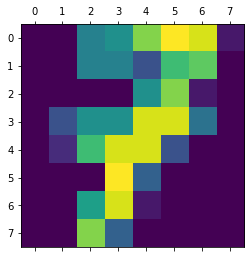

In [7]:
digits = load_digits()
X = digits.data
y = digits.target
print (X.shape)
print (y.shape)
print ("\nPrinting first digit")
plt.matshow(digits.images[7])
plt.show()

We are performing the standardizing of data with the following code to demean the series,
followed by standard deviation to put all the 64 dimensions in a similar scale. Though, in
this case, it is not very stringent, as all the values lie between 0 and 255, but by doing so we
reduce the computational requirement a little bit:

In [8]:
x_vars_stdscle = StandardScaler().fit_transform(X)

In [9]:
x_train,x_test,y_train,y_test =train_test_split(x_vars_stdscle,y,train_size = 0.7,random_state=42)

Tuning the hyperparameters plays a crucial role in tuning a deep learning model (of course,
this is applicable to any of the machine learning models too!). We have used nb_classes as
10, due to the reason that the digits range from 0-9; batch_size as 128, which means for
each batch, we utilize 128 observations to update the weights; and finally, we have used
nb_epochs as 200, which means the number of epochs the model needs to be trained is 200
(also, we can imagine that the model will be updated 200 times from start to end):

In [10]:
# Defining hyper parameters
np.random.seed(1337)
nb_classes = 10   # output layer --- output class is 10 for figure range from 0 - 9
batch_size = 128  # to Update the weight
nb_epochs = 200   # Epochs to train the model

The following code actually creates the n-dimensional vector for multiclass values based on
the nb_classes value. Here, we will get the dimension as 10 for all train observations for
training using the softmax classifier:

In [11]:
Y_train = np_utils.to_categorical(y_train, nb_classes)

The core model building code, which looks like Lego blocks, is shown as follows. Here we,
initiate the model as sequential rather than parallel and so on:

In [12]:
#Deep Layer Model building in Keras
model = Sequential()

In the first layer, we are using 100 neurons with input shape as 64 columns (as the number
of columns in X is 64), followed by relu activation functions with dropout value as 0.5 (we
have chosen dropout randomly; readers are encouraged to try different values and see how
the results vary):

In [13]:
model.add(Dense(100,input_shape= (64,)))
model.add(Activation('relu'))
model.add(Dropout(0.4))

In the second layer, we are using 50 neurons (to compare the results obtained using the
scikit-learn methodology, we have used a similar architecture):

In [14]:
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dropout(0.4))

In the output layer, the number of classes needs to be used with the softmax classifier:

In [15]:
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

#### Here, we are compiling with categorical_crossentropy, as the output is multiclass; whereas, if we want to use binary class, we need to use binary_crossentropy instead

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

#### The model is being trained in the following step with all the given batch sizes and number of epochs

In [17]:
#Model training
model.fit(x_train, Y_train, batch_size=batch_size,nb_epoch=nb_epochs,verbose=1)

# Here, we just present the starting and ending phase of epochs with loss values. If we 
# observe, loss values have been minimized from 2.6925 to 0.0611 across 200 iterations: --- (with drop out 0.5 and i used 0.4)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/200
1257/1257 [==============================] - 2s 2ms/step - loss: 2.6872
Epoch 2/200
1257/1257 [==============================] - 0s 45us/step - loss: 2.1901
Epoch 3/200
1257/1257 [==============================] - 0s 51us/step - loss: 1.9172
Epoch 4/200
1257/1257 [==============================] - 0s 54us/step - loss: 1.6463
Epoch 5/200
1257/1257 [==============================] - 0s 48us/step - loss: 1.5039
Epoch 6/200
1257/1257 [==============================] - 0s 54us/step - loss: 1.3136
Epoch 7/200
1257/1257 [==============================] - 0s 48us/step - loss: 1.1406
Epoch 8/200
1257/1257 [==============================] - 0s 32us/step - loss: 0.9979
Epoch 9/200
1257/1257 [==============================] - 0s 35us/step - loss: 0.8758
Epoch 10/200
1257/1257 [==============================] - 0s 33us/step - loss: 0.8155
Epoch 11/200
1257/1257 [==============================] - 0s 38us/step - loss: 0.6939
Epoch 12/200
1257/1257 [==============================] - 0s 39u

1257/1257 [==============================] - 0s 35us/step - loss: 0.0632
Epoch 97/200
1257/1257 [==============================] - 0s 32us/step - loss: 0.0851
Epoch 98/200
1257/1257 [==============================] - 0s 52us/step - loss: 0.0868
Epoch 99/200
1257/1257 [==============================] - 0s 29us/step - loss: 0.0793
Epoch 100/200
1257/1257 [==============================] - 0s 30us/step - loss: 0.0790
Epoch 101/200
1257/1257 [==============================] - 0s 29us/step - loss: 0.0686
Epoch 102/200
1257/1257 [==============================] - 0s 33us/step - loss: 0.0703
Epoch 103/200
1257/1257 [==============================] - 0s 29us/step - loss: 0.0797
Epoch 104/200
1257/1257 [==============================] - 0s 29us/step - loss: 0.0847
Epoch 105/200
1257/1257 [==============================] - 0s 35us/step - loss: 0.0685
Epoch 106/200
1257/1257 [==============================] - 0s 29us/step - loss: 0.0847
Epoch 107/200
1257/1257 [==============================] - 0

1257/1257 [==============================] - 0s 32us/step - loss: 0.0348
Epoch 191/200
1257/1257 [==============================] - 0s 31us/step - loss: 0.0275
Epoch 192/200
1257/1257 [==============================] - 0s 32us/step - loss: 0.0385
Epoch 193/200
1257/1257 [==============================] - 0s 32us/step - loss: 0.0404
Epoch 194/200
1257/1257 [==============================] - 0s 29us/step - loss: 0.0392
Epoch 195/200
1257/1257 [==============================] - 0s 54us/step - loss: 0.0257
Epoch 196/200
1257/1257 [==============================] - 0s 32us/step - loss: 0.0332
Epoch 197/200
1257/1257 [==============================] - 0s 41us/step - loss: 0.0329
Epoch 198/200
1257/1257 [==============================] - 0s 32us/step - loss: 0.0314
Epoch 199/200
1257/1257 [==============================] - 0s 29us/step - loss: 0.0335
Epoch 200/200
1257/1257 [==============================] - 0s 30us/step - loss: 0.0349


In [19]:
#Model Prediction

y_train_predclass = model.predict_classes(x_train,batch_size=batch_size)
y_test_predclass = model.predict_classes(x_test,batch_size=batch_size)
print ("\n\nDeep Neural Network - Train accuracy:"),(round(accuracy_score(y_train,y_train_predclass),3))
print ("\nDeep Neural Network - Train Classification Report")
print (classification_report (y_train,y_train_predclass))
print ("\nDeep Neural Network - Train Confusion Matrix\n")
print (pd.crosstab(y_train,y_train_predclass,rownames =["Actuall"],colnames = ["Predicted"]) )



Deep Neural Network - Train accuracy:

Deep Neural Network - Train Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       132
           2       1.00      1.00      1.00       130
           3       1.00      1.00      1.00       129
           4       1.00      1.00      1.00       121
           5       1.00      1.00      1.00       116
           6       1.00      1.00      1.00       128
           7       1.00      1.00      1.00       124
           8       1.00      1.00      1.00       131
           9       1.00      1.00      1.00       121

    accuracy                           1.00      1257
   macro avg       1.00      1.00      1.00      1257
weighted avg       1.00      1.00      1.00      1257


Deep Neural Network - Train Confusion Matrix

Predicted    0    1    2    3    4    5    6    7    8    9
Actuall                                    

In [20]:
print ("\nDeep Neural Network - Testaccuracy:"),(round(accuracy_score(y_test, y_test_predclass),3))
print ("\nDeep Neural Network - Test Classification Report")
print (classification_report(y_test,y_test_predclass))
print ("\nDeep Neural Network - Test Confusion Matrix\n")
print (pd.crosstab(y_test,y_test_predclass,rownames = ["Actuall"],colnames = ["Predicted"]) )


Deep Neural Network - Testaccuracy:

Deep Neural Network - Test Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.98      0.98      0.98        50
           2       0.94      1.00      0.97        47
           3       1.00      0.94      0.97        54
           4       0.97      1.00      0.98        60
           5       0.96      0.97      0.96        66
           6       0.98      0.98      0.98        53
           7       1.00      0.98      0.99        55
           8       0.98      0.95      0.96        43
           9       1.00      0.98      0.99        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540


Deep Neural Network - Test Confusion Matrix

Predicted   0   1   2   3   4   5   6   7   8   9
Actuall                                          
0       

However, the true evaluation is performed on the test data instead. Here, we have got 97.6
percentage accuracy, which is similar to the scikit-learn accuracy of 97.78 percentage.
Hence, it has been proved that we have successfully replicated the results in the deep
learning software; however, in Keras, we can do much better things than in scikit-learn
(such as convolutional neural networks, recurrent neural networks, auto encoders, and so
on, which are very advanced in nature).